# Parte 1

In [1]:
from astropy.io.votable import parse
from astropy.table import Table


votable = parse("1715657717558O-result.vot")


table = votable.get_first_table().to_table()
print(table)

     SOURCE_ID              ra         ... radial_velocity mh_gspspec
                           deg         ...      km / s        dex    
------------------- ------------------ ... --------------- ----------
5459877261220464512 149.70611681294855 ...        79.24201         --
5459233389783747968 152.37909102063972 ...       16.321693       -0.3
5460192099502918656 151.86436887949762 ...       53.045547         --
5463677340905512960 151.16936133573813 ...       32.012726      -0.13
5462669230478657152 153.79661772767756 ...        35.99848         --
5461473610365447680  155.4105841546194 ...      -18.218866      -0.22
5462845976972672000 154.72999566638708 ...        26.49547      -0.19
5459508508210738560 150.37331151993706 ...       -16.62605      -0.16
5459509234062226176 150.45321925569561 ...       24.751276       0.24
5459518889148750336  150.5649310401633 ...      -6.9741545      -0.27
                ...                ... ...             ...        ...
4065673187024022272 

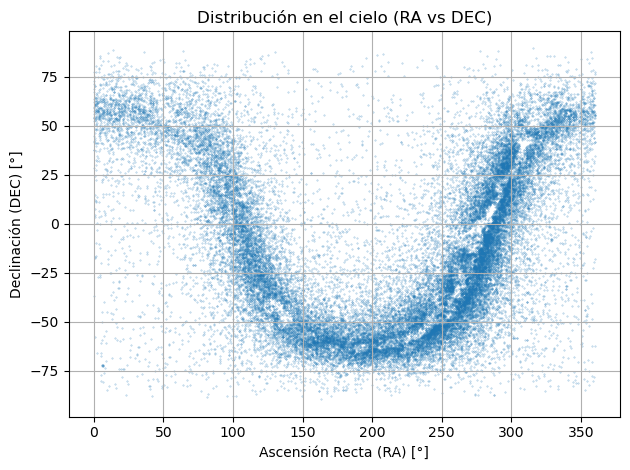

c:\Users\Maxlo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


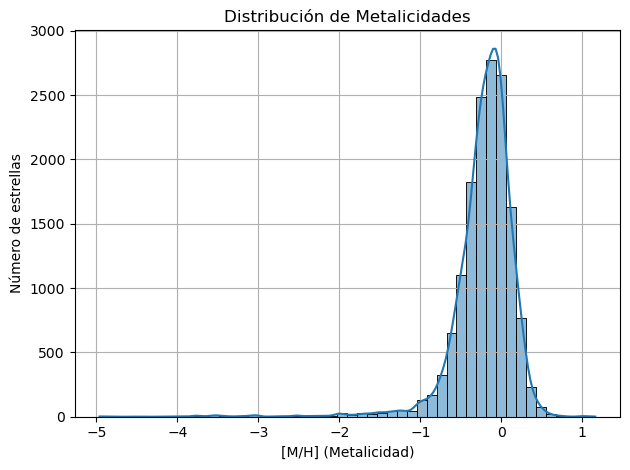

Media con sigma clipping: -0.13605805595279788


c:\Users\Maxlo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


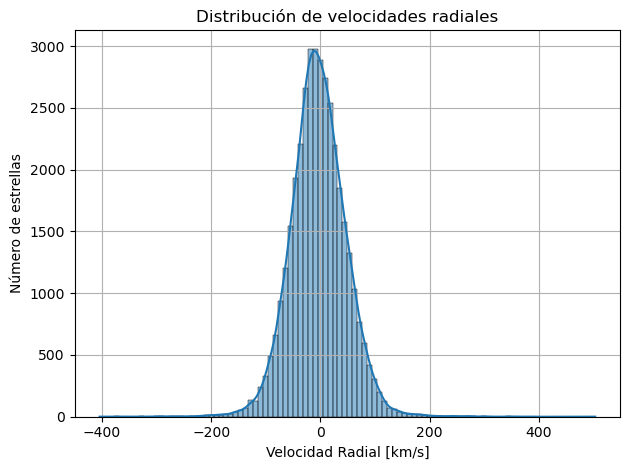

Media con sigma clipping: -5.182154656284899


c:\Users\Maxlo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


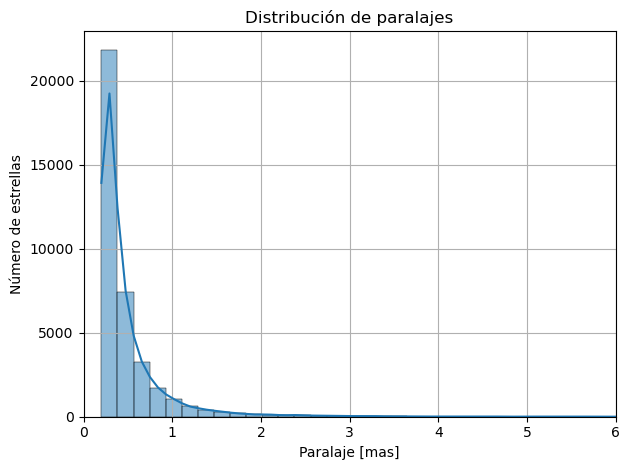

Media con sigma clipping: 0.2930793895519497


In [2]:
### Graficos.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.stats import sigma_clip
# ------------------------------------
# 1. RA vs DEC (distribución en el cielo)
# ------------------------------------
plt.figure()
plt.scatter(table['ra'], table['dec'], s=0.1, alpha=0.5)
plt.xlabel('Ascensión Recta (RA) [°]')
plt.ylabel('Declinación (DEC) [°]')
plt.title('Distribución en el cielo (RA vs DEC)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ra_vs_dec.png')
plt.show()

# ------------------------------------
# 2. Histograma de metalicidades
# ------------------------------------
plt.figure()
sns.histplot(table['mh_gspspec'], bins=50, kde=True)
plt.xlabel('[M/H] (Metalicidad)')
plt.ylabel('Número de estrellas')
plt.title('Distribución de Metalicidades')
plt.grid(True)
plt.tight_layout()
plt.savefig('metalicidades.png')
plt.show()

datos_clip = sigma_clip(table["mh_gspspec"], sigma=2, maxiters=5)
media_sin_outliers = np.mean(datos_clip.data[~datos_clip.mask])
print("Media con sigma clipping:", media_sin_outliers)

# ------------------------------------
# 3. Histograma de velocidades radiales
# ------------------------------------
plt.figure()
sns.histplot(table['radial_velocity'], bins=100, kde=True)
plt.xlabel('Velocidad Radial [km/s]')
plt.ylabel('Número de estrellas')
plt.title('Distribución de velocidades radiales')
plt.grid(True)
plt.tight_layout()
plt.savefig('velocidades_radiales.png')
plt.show()

datos_clip = sigma_clip(table["radial_velocity"], sigma=2, maxiters=5)
media_sin_outliers = np.mean(datos_clip.data[~datos_clip.mask])
print("Media con sigma clipping:", media_sin_outliers)

# ------------------------------------
# 4. Histograma de paralajes
# ------------------------------------
plt.figure()
sns.histplot(table['parallax'], bins=100, kde=True)
plt.xlabel('Paralaje [mas]')
plt.ylabel('Número de estrellas')
plt.title('Distribución de paralajes')
plt.grid(True)
plt.xlim(0,6)
plt.tight_layout()
plt.savefig('paralajes.png')
plt.show()

datos_clip = sigma_clip(table["parallax"], sigma=2, maxiters=5)
media_sin_outliers = np.mean(datos_clip.data[~datos_clip.mask])
print("Media con sigma clipping:", media_sin_outliers)


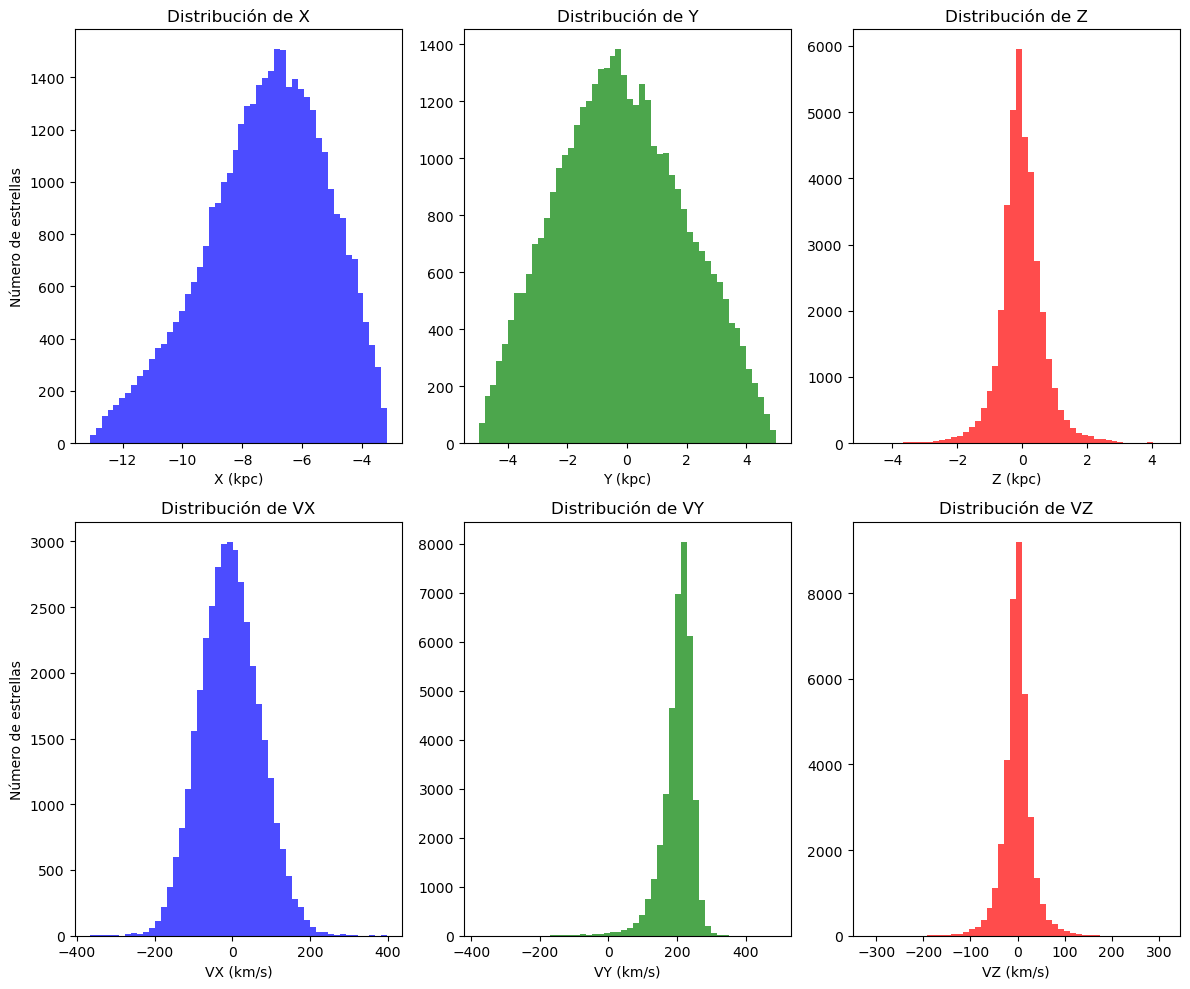

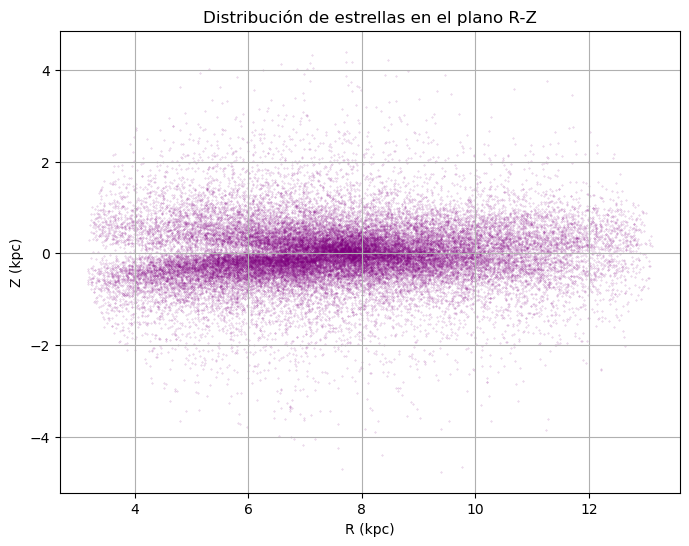

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactocentric
from astropy import units as u

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactocentric


parallax_arcsec = table['parallax'] * 0.001  # Convertir mas -> arcsec
distancia_pc = (1.0 / parallax_arcsec) * 0.001  # Distancia en parsecs (sin unidades)



table[""]

# --- 3. Crear SkyCoord SIN unidades Astropy ---
coords = SkyCoord(
    ra=table["ra"]* (np.pi /180) * u.rad,  # ¡Ya en radianes!
    dec=table["dec"]*(np.pi /180) * u.rad,
    distance=distancia_pc* u.kpc,  # Sin unidades
    pm_ra_cosdec=table['pmra'],  # mas/yr (sin unidades)
    pm_dec=table['pmdec'],
    radial_velocity=table['radial_velocity'],  # km/s (sin unidades)
    frame='icrs' # Desactivar verificación de unidades
)

# --- 4. Convertir a coordenadas galactocéntricas ---
galacto = coords.transform_to(Galactocentric())

# Extraer componentes (en kpc y km/s)
X = galacto.x.value  # kpc
Y = galacto.y.value
Z = galacto.z.value
VX = galacto.v_x.value  # km/s
VY = galacto.v_y.value
VZ = galacto.v_z.value

# --- 5. Gráficos ---
# Ejemplo: R vs Z
R = np.sqrt(X**2 + Y**2)  # Radio galactocéntrico
R = np.sqrt(X**2 + Y**2)  # Radio galactocéntrico en kpc

# --- 4. Graficar distribuciones ---
plt.figure(figsize=(12, 10))

# Posiciones galactocéntricas
plt.subplot(2, 3, 1)
plt.hist(X, bins=50, color='blue', alpha=0.7)
plt.xlabel('X (kpc)')
plt.ylabel('Número de estrellas')
plt.title('Distribución de X')

plt.subplot(2, 3, 2)
plt.hist(Y, bins=50, color='green', alpha=0.7)
plt.xlabel('Y (kpc)')
plt.title('Distribución de Y')

plt.subplot(2, 3, 3)
plt.hist(Z, bins=50, color='red', alpha=0.7)
plt.xlabel('Z (kpc)')
plt.title('Distribución de Z')

# Velocidades galactocéntricas
plt.subplot(2, 3, 4)
plt.hist(VX, bins=50, color='blue', alpha=0.7)
plt.xlabel('VX (km/s)')
plt.ylabel('Número de estrellas')
plt.title('Distribución de VX')

plt.subplot(2, 3, 5)
plt.hist(VY, bins=50, color='green', alpha=0.7)
plt.xlabel('VY (km/s)')
plt.title('Distribución de VY')

plt.subplot(2, 3, 6)
plt.hist(VZ, bins=50, color='red', alpha=0.7)
plt.xlabel('VZ (km/s)')
plt.title('Distribución de VZ')

plt.tight_layout()
plt.savefig('distribuciones_galactocentricas.png')

plt.show()

# --- 5. Graficar R vs Z (disco galáctico) ---
plt.figure(figsize=(8, 6))
plt.scatter(R, Z, s=0.1, alpha=0.3, color='purple')
plt.xlabel('R (kpc)')
plt.ylabel('Z (kpc)')
plt.title('Distribución de estrellas en el plano R-Z')
plt.grid(True)
plt.savefig('R_vs_Z.png')
plt.show()


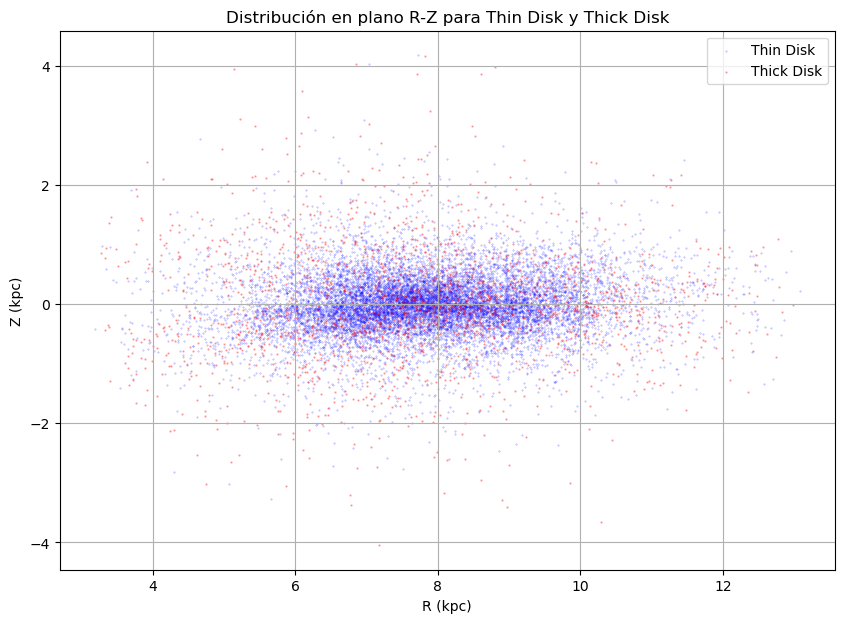

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactocentric
from astropy import units as u

# --- 1. Calcular distancia ---
parallax_arcsec = table['parallax'] * 0.001  # mas → arcsec
distancia_pc = (1.0 / parallax_arcsec) * 0.001  # parsecs

# --- 2. Crear SkyCoord ---
coords = SkyCoord(
    ra=table["ra"] * (np.pi / 180) * u.rad,
    dec=table["dec"] * (np.pi / 180) * u.rad,
    distance=distancia_pc * u.kpc,
    pm_ra_cosdec=table['pmra'],
    pm_dec=table['pmdec'],
    radial_velocity=table['radial_velocity'],
    frame='icrs'
)

# --- 3. Convertir a Galactocéntricas ---
galacto = coords.transform_to(Galactocentric())

X = galacto.x.value
Y = galacto.y.value
Z = galacto.z.value

R = np.sqrt(X**2 + Y**2)

# --- 4. Separar por metalicidad ---
mh = table['mh_gspspec']

# Thin disk: -0.5 < [M/H] < +0.3
mask_thin = (mh > -0.5) & (mh <= 0.3)
R_thin = R[mask_thin]
Z_thin = Z[mask_thin]

# Thick disk: -2.2 < [M/H] <= -0.5
mask_thick = (mh > -2.2) & (mh <= -0.5)
R_thick = R[mask_thick]
Z_thick = Z[mask_thick]

# --- 5. Graficar comparación ---
plt.figure(figsize=(10, 7))
plt.scatter(R_thin, Z_thin, s=0.1, alpha=0.4, label='Thin Disk', color='blue')
plt.scatter(R_thick, Z_thick, s=0.5, alpha=0.3, label='Thick Disk', color='red')
plt.xlabel('R (kpc)')
plt.ylabel('Z (kpc)')
plt.title('Distribución en plano R-Z para Thin Disk y Thick Disk')
plt.legend()
plt.grid(True)
plt.savefig('R_vs_Z_thin_thick.png')
plt.show()


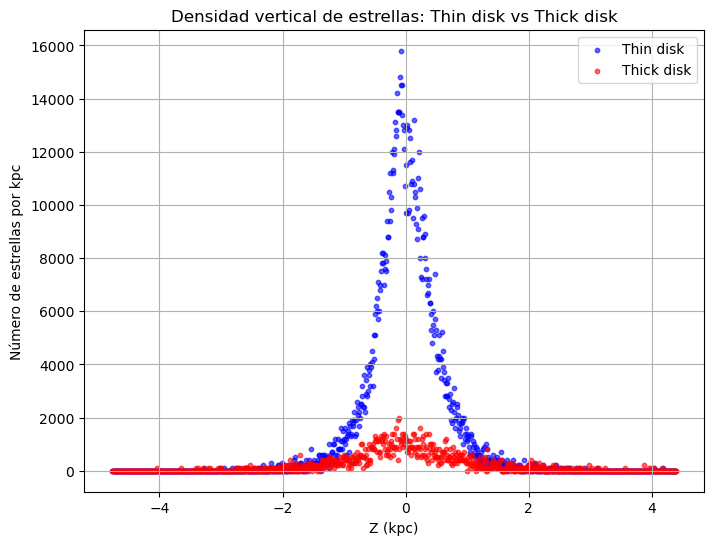

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactocentric
from astropy import units as u

# Filtrar thin disk y thick disk según metalicidad
thin_mask = (table['mh_gspspec'] >= -0.5) & (table['mh_gspspec'] <= 0.3)
thick_mask = (table['mh_gspspec'] >= -2.2) & (table['mh_gspspec'] < -0.5)

# Repetir cálculo de coordenadas galactocéntricas para thin disk
parallax_arcsec = table['parallax'] * 0.001
distancia_pc = (1.0 / parallax_arcsec) * 0.001  # en kpc

coords = SkyCoord(
    ra=table["ra"]* (np.pi /180) * u.rad,
    dec=table["dec"]* (np.pi /180) * u.rad,
    distance=distancia_pc * u.kpc,
    pm_ra_cosdec=table['pmra'],
    pm_dec=table['pmdec'],
    radial_velocity=table['radial_velocity'],
    frame='icrs'
)

galacto = coords.transform_to(Galactocentric())
Z = galacto.z.value  # en kpc

# Extraer Z para cada población
Z_thin = Z[thin_mask]
Z_thick = Z[thick_mask]

# Definir bins de 10 pc (0.01 kpc) para histogramas en el rango de Z
bins = np.arange(np.min(Z), np.max(Z), 0.01)

# Histogramas (no graficados)
hist_thin, bin_edges = np.histogram(Z_thin, bins=bins)
hist_thick, _ = np.histogram(Z_thick, bins=bins)

# Calcular centro de cada bin para graficar
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficar scatter densidad vs Z para ambas poblaciones
plt.figure(figsize=(8,6))
plt.scatter(bin_centers, hist_thin / 0.01, s=10, color='blue', alpha=0.6, label='Thin disk')
plt.scatter(bin_centers, hist_thick / 0.01, s=10, color='red', alpha=0.6, label='Thick disk')
plt.xlabel('Z (kpc)')
plt.ylabel('Número de estrellas por kpc')
plt.title('Densidad vertical de estrellas: Thin disk vs Thick disk')
plt.legend()
plt.grid(True)
plt.savefig('scatter_density_vs_Z.png')
plt.show()


Escala de altura thin disk zh = 0.452 kpc
Escala de altura thick disk zh = 2.013 kpc


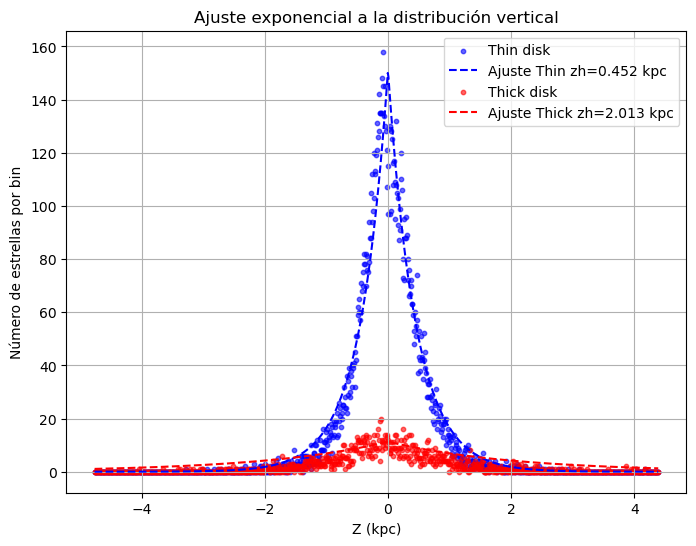

In [27]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función exponencial para ajustar
def exp_func(z, n0, zh):
    return n0 * np.exp(-np.abs(z)/zh)

# Usar el histograma calculado previamente (de la pregunta e)
# bin_centers, hist_thin, hist_thick ya definidos

# Filtrar para evitar ceros y valores muy bajos (que complican el ajuste)
mask_thin = hist_thin > 5
mask_thick = hist_thick > 5

# Ajuste para thin disk
popt_thin, pcov_thin = curve_fit(exp_func, bin_centers[mask_thin], hist_thin[mask_thin])
n0_thin, zh_thin = popt_thin

# Ajuste para thick disk
popt_thick, pcov_thick = curve_fit(exp_func, bin_centers[mask_thick], hist_thick[mask_thick])
n0_thick, zh_thick = popt_thick

print(f"Escala de altura thin disk zh = {zh_thin:.3f} kpc")
print(f"Escala de altura thick disk zh = {zh_thick:.3f} kpc")

# Graficar datos y ajuste
plt.figure(figsize=(8,6))
plt.scatter(bin_centers, hist_thin, s=10, color='blue', alpha=0.6, label='Thin disk')
plt.plot(bin_centers, exp_func(bin_centers, *popt_thin), 'b--', label=f'Ajuste Thin zh={zh_thin:.3f} kpc')
plt.scatter(bin_centers, hist_thick, s=10, color='red', alpha=0.6, label='Thick disk')
plt.plot(bin_centers, exp_func(bin_centers, *popt_thick), 'r--', label=f'Ajuste Thick zh={zh_thick:.3f} kpc')
plt.xlabel('Z (kpc)')
plt.ylabel('Número de estrellas por bin')
plt.title('Ajuste exponencial a la distribución vertical')
plt.legend()
plt.grid(True)
plt.savefig("histograma_exponencial_fit.png")
plt.show()


In [26]:
import numpy as np

# Definir filtros según metalicidad para thin y thick disk
thin_disk = (table['mh_gspspec'] >= -0.5) & (table['mh_gspspec'] <= 0.3)
thick_disk = (table['mh_gspspec'] >= -2.2) & (table['mh_gspspec'] < -0.5)

# Extraer velocidades verticales para cada población
Vz_thin = VZ[thin_disk]
Vz_thick = VZ[thick_disk]

# Calcular dispersión (desviación estándar) en Vz para cada población
sigma_Vz_thin = np.std(Vz_thin)
sigma_Vz_thick = np.std(Vz_thick)

print(f"Dispersión en Vz para thin disk: {sigma_Vz_thin:.2f} km/s")
print(f"Dispersión en Vz para thick disk: {sigma_Vz_thick:.2f} km/s")


Dispersión en Vz para thin disk: 23.34 km/s
Dispersión en Vz para thick disk: 45.29 km/s


# Parte 2

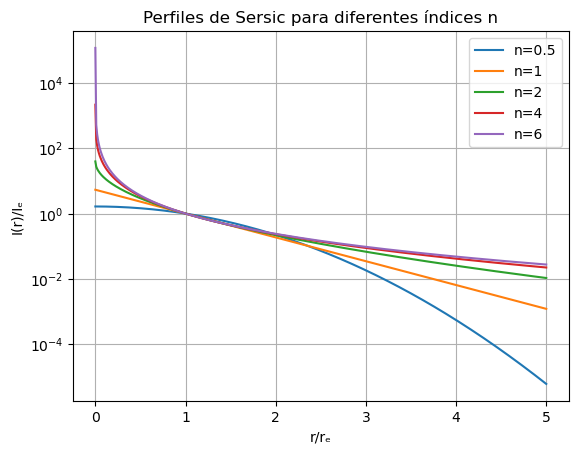

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaincinv

# Definir función de Sersic
def sersic_profile(r_re, n):
    if n == 0.5:
        bn = 0.5
    elif n == 1:
        bn = 1.678
    elif n == 2:
        bn = gammaincinv(2*2, 0.5)
    elif n == 4:
        bn = 7.669
    elif n == 6:
        bn = gammaincinv(2*6, 0.5)
    return np.exp(-bn * (r_re**(1/n) - 1))

# Rango de r/r_e
r_re = np.linspace(0, 5, 500)

# Valores de n
n_values = [0.5, 1, 2, 4, 6]

# Graficar
plt.figure()
for n in n_values:
    profile = sersic_profile(r_re, n)
    plt.plot(r_re, profile, label=f'n={n}')

plt.xlabel('r/rₑ')
plt.ylabel('I(r)/Iₑ')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.title('Perfiles de Sersic para diferentes índices n')
plt.savefig("Perfiles de sernic")
plt.show()


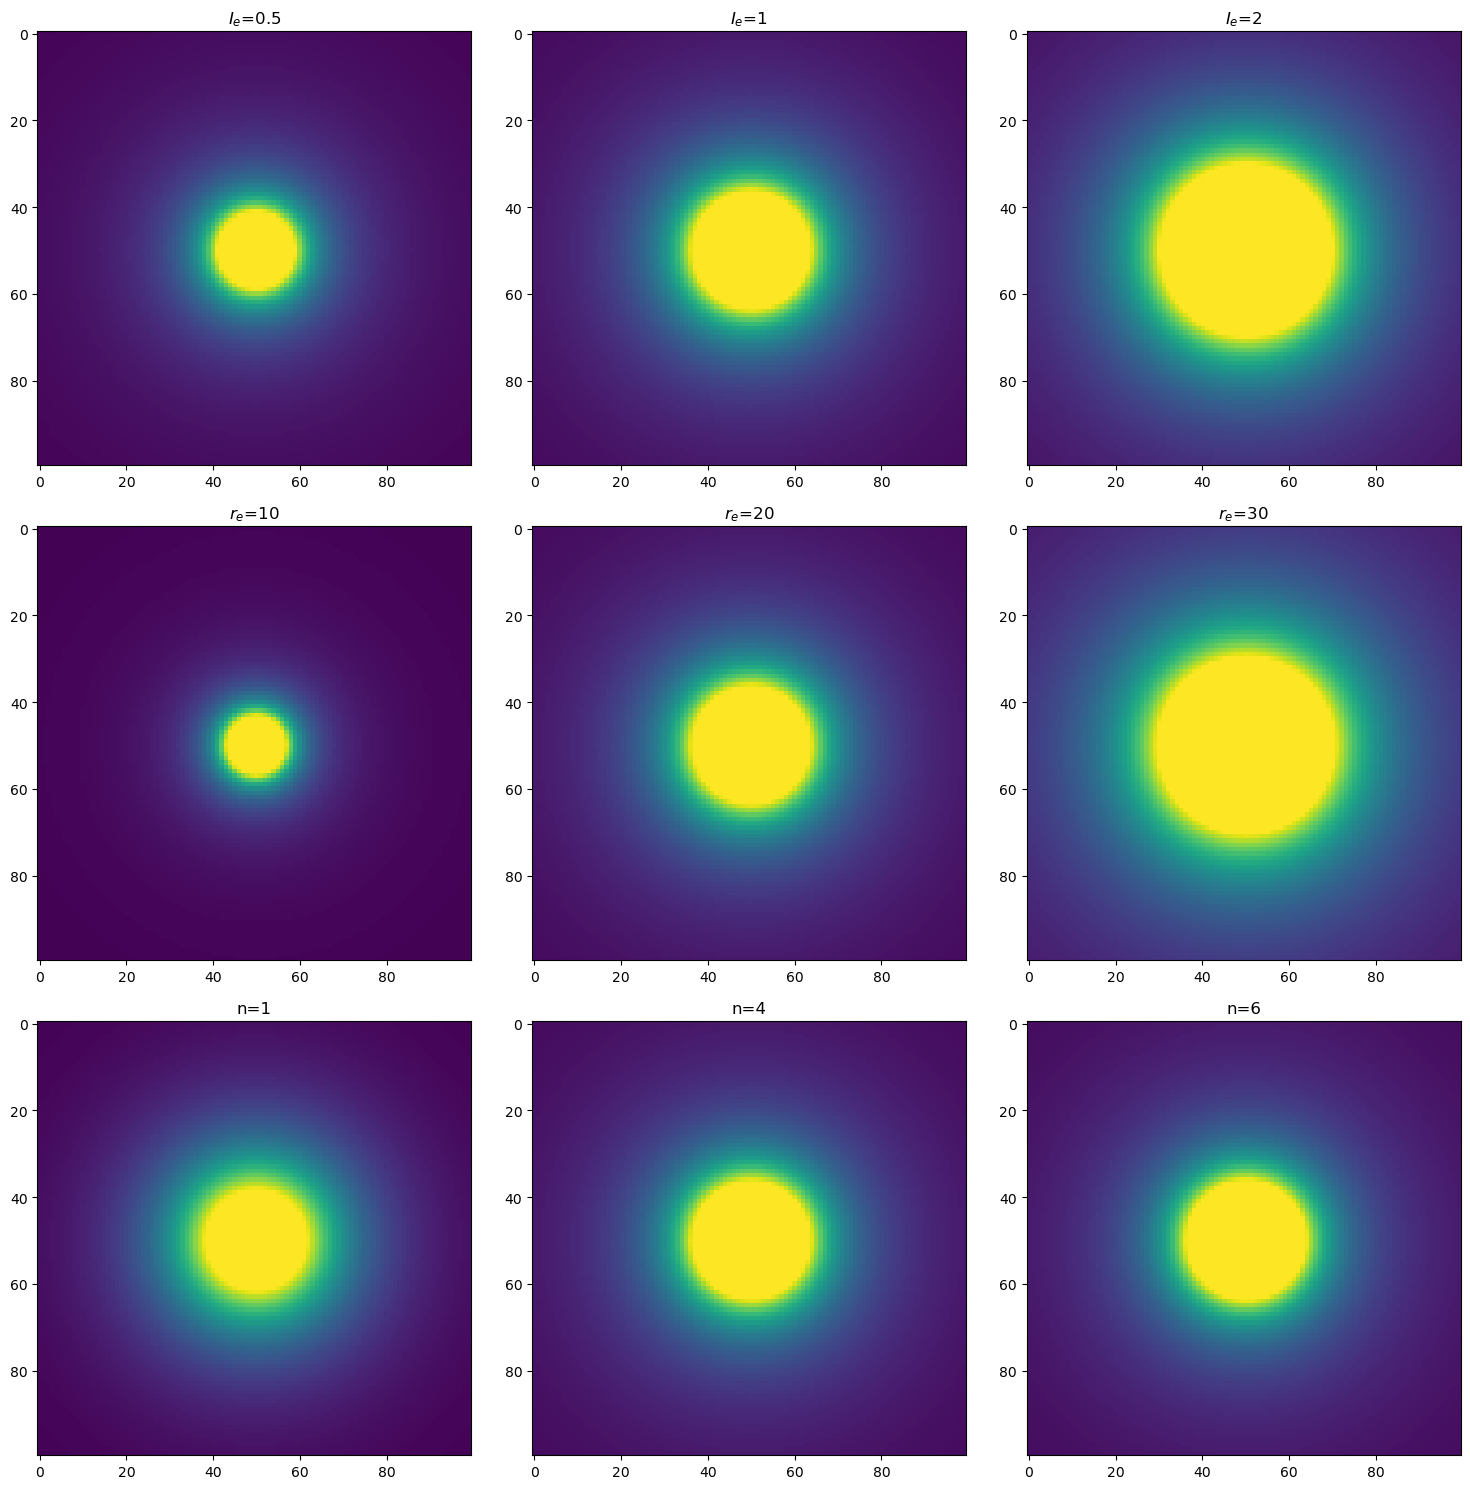

In [4]:
from astropy.modeling.models import Sersic2D
import numpy as np
import matplotlib.pyplot as plt

# Crear grid
y, x = np.mgrid[0:100, 0:100]

# Parámetros comunes
I_e = 1
r_e = 20
ellip = 0
theta = 0

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, I in enumerate([0.5, 1, 2]):
    model = Sersic2D(amplitude=I, r_eff=r_e, n=4, x_0=50, y_0=50)
    img = model(x, y)
    axes[0,i].imshow(img, vmin=0, vmax=2)
    axes[0,i].set_title(f'$I_e$={I}')

for i, r in enumerate([10, 20, 30]):
    model = Sersic2D(amplitude=I_e, r_eff=r, n=4, x_0=50, y_0=50)
    img = model(x, y)
    axes[1,i].imshow(img, vmin=0, vmax=2)
    axes[1,i].set_title(f'$r_e$={r}')

for i, n in enumerate([1, 4, 6]):
    model = Sersic2D(amplitude=I_e, r_eff=r_e, n=n, x_0=50, y_0=50)
    img = model(x, y)
    axes[2,i].imshow(img, vmin=0, vmax=2)
    axes[2,i].set_title(f'n={n}')

plt.tight_layout()
plt.savefig("Perfil de sersic 2D")
plt.show()


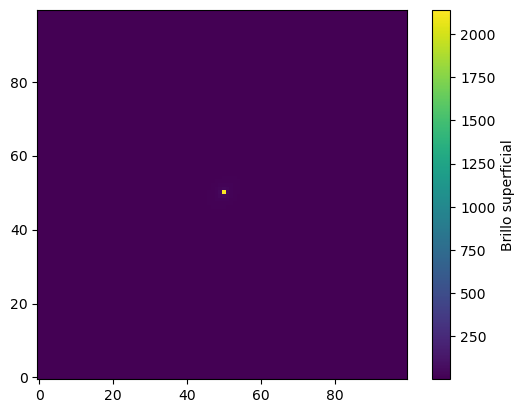

In [5]:
from astropy.modeling.models import Sersic2D
import numpy as np
import matplotlib.pyplot as plt

# Crear una cuadrícula de coordenadas (ejemplo: imagen 100x100 píxeles)
y, x = np.mgrid[0:100, 0:100]

# Definir el modelo (ejemplo: n=4, r_e=20 píxeles, I_e=1)
model = Sersic2D(amplitude=1, r_eff=20, n=4, x_0=50, y_0=50, ellip=0.3, theta=np.pi/4)
image = model(x, y)

# Visualizar
plt.imshow(image, origin='lower', cmap='viridis')
plt.colorbar(label='Brillo superficial')
plt.show()